# FIFA 19 PLAYERS DATA ANALYSIS AND VISUALIZATION

My recent addiction to the beautiful game of football was the reason behind this notebook.

I have tried my best to keep this notebook as simple as possible so that even a beginner can understand it easily. At the same time I have made efforts to analyse the dataset in different aspects effectively. I will keep updating the notebook as and when I come up with new things. Hope you like it!!!

The notebook contains:

    Basic Data Analysis in the first half 
    Data Visualization in the other half

I have used the following packages for visualizations:

    Matplotlib
    Seaborn
    Plotly


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [3]:
import os
print(os.listdir("../input/fifa19"))

['data.csv']


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa19/data.csv


In [5]:
df =pd.read_csv('/kaggle/input/fifa19/data.csv')

In [6]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# Removing less significant column

In [8]:
df.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face','Loaned From' ,'Release Clause',
                   'Joined', 'Contract Valid Until'],axis=1,inplace=True)

# Dealing with missing values

In [9]:
df.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
                 ..
GKDiving         48
GKHandling       48
GKKicking        48
GKPositioning    48
GKReflexes       48
Length: 78, dtype: int64

In [10]:
df['Club'].fillna(value='No Club', inplace=True)

In [11]:
df[df['Position'].isna()][['Name', 'Nationality', 'LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                              'LAM', 'CAM', 'RAM', 'LM', 'LCM','CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 
                              'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,Name,Nationality,LS,ST,RS,LW,LF,CF,RF,RW,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
5018,R. Raldes,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6736,J. Arce,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7922,L. Gutiérrez,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9905,R. Vargas,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10628,D. Bejarano,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.drop(index=df[df['Position'].isna()].index, inplace=True)

In [13]:
df.isnull().sum()[df.isnull().sum() > 0]

LS     2025
ST     2025
RS     2025
LW     2025
LF     2025
CF     2025
RF     2025
RW     2025
LAM    2025
CAM    2025
RAM    2025
LM     2025
LCM    2025
CM     2025
RCM    2025
RM     2025
LWB    2025
LDM    2025
CDM    2025
RDM    2025
RWB    2025
LB     2025
LCB    2025
CB     2025
RCB    2025
RB     2025
dtype: int64

In [14]:
len(df[df['Position'] == 'GK'])

2025

In [15]:
df.fillna(value=0, inplace=True)

# Now lets begin our Data Analysis 

# Total no of Internationational Teams and Clubs 

In [16]:
df['Nationality'].nunique()

164

In [17]:
df['Club'].nunique()

652

# Lets see the youngest player

In [18]:
df.sort_values(by='Age').head(1)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
18206,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,Right,1.0,...,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0


# Now , lets see the other way - The eldest one 

In [19]:
df.sort_values(by='Age',ascending = False).head(1)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
4741,O. Pérez,45,Mexico,71,71,Pachuca,€160K,€8K,Right,2.0,...,23.0,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0


# Money Money Money

In [20]:

# defining a function for cleaning the value and wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)


df['Value'] = df['Value'].apply(lambda x: extract_value_from(x))
df['Wage'] = df['Wage'].apply(lambda x: extract_value_from(x))


# lets see the top 5 most valued players 

In [21]:
df.sort_values(by='Value',ascending = False).head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
15,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,3.0,...,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0


# And the highest earning players are

In [22]:
df.sort_values(by='Wage',ascending = False).head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,5.0,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0


# Players with overall rating of 90 and above

In [23]:
def top(x):
    return df[df['Overall'] > x][['Name','Nationality','Club','Overall','Position']]

top(90)

,Name,Nationality,Club,Overall,Position
0,L. Messi,Argentina,FC Barcelona,94,RF
1,Cristiano Ronaldo,Portugal,Juventus,94,ST
2,Neymar Jr,Brazil,Paris Saint-Germain,92,LW
3,De Gea,Spain,Manchester United,91,GK
4,K. De Bruyne,Belgium,Manchester City,91,RCM
5,E. Hazard,Belgium,Chelsea,91,LF
6,L. Modrić,Croatia,Real Madrid,91,RCM
7,L. Suárez,Uruguay,FC Barcelona,91,RS
8,Sergio Ramos,Spain,Real Madrid,91,RCB


# Players with highest International reputation

In [24]:
def Inttop(x):
    return df[df['International Reputation'] == x][['Name','Nationality','Club','Overall','International Reputation','Position']]

Inttop(5)                                                   

,Name,Nationality,Club,Overall,International Reputation,Position
0,L. Messi,Argentina,FC Barcelona,94,5.0,RF
1,Cristiano Ronaldo,Portugal,Juventus,94,5.0,ST
2,Neymar Jr,Brazil,Paris Saint-Germain,92,5.0,LW
7,L. Suárez,Uruguay,FC Barcelona,91,5.0,RS
22,M. Neuer,Germany,FC Bayern München,89,5.0,GK
109,Z. Ibrahimović,Sweden,LA Galaxy,85,5.0,RS


# Highly skilled players

In [25]:
df[(df['Skill Moves'] == 5)][['Name','Nationality','Club','Overall','Skill Moves','Position']].head(5)

,Name,Nationality,Club,Overall,Skill Moves,Position
1,Cristiano Ronaldo,Portugal,Juventus,94,5.0,ST
2,Neymar Jr,Brazil,Paris Saint-Germain,92,5.0,LW
25,K. Mbappé,France,Paris Saint-Germain,88,5.0,RM
32,Coutinho,Brazil,FC Barcelona,88,5.0,LW
35,Marcelo,Brazil,Real Madrid,88,5.0,LB


# The best in the business

In [26]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][0]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


# Top 5 Left Footed players

In [27]:
df[df['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(5)

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium


# Top 5 Right Footed players

In [28]:
df[df['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(5)

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium


# Clubs with highest number of different country players

In [29]:
df.groupby(df['Club'])['Nationality'].nunique().sort_values(ascending = False).head(5)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
West Ham United           18
Lazio                     18
Name: Nationality, dtype: int64

# I'm a Manchester City Fan and I want the details of the players in the club

In [30]:
def club(x):
    return df[(df['Club'] == x)][['Name','Age','Nationality','Overall','Potential','Position','Value','Wage']]

club('Manchester City').head(15)

,Name,Age,Nationality,Overall,Potential,Position,Value,Wage
4,K. De Bruyne,27,Belgium,91,92,RCM,102000000.0,355000.0
13,David Silva,32,Spain,90,90,LCM,60000000.0,285000.0
23,S. Agüero,30,Argentina,89,89,ST,64500000.0,300000.0
55,L. Sané,22,Germany,86,92,LW,61000000.0,195000.0
56,Bernardo Silva,23,Portugal,86,91,RW,59500000.0,180000.0
57,Ederson,24,Brazil,86,90,GK,41500000.0,125000.0
60,R. Sterling,23,England,86,89,RW,56500000.0,195000.0
75,Fernandinho,33,Brazil,86,86,CDM,18000000.0,185000.0
84,R. Mahrez,27,Algeria,85,85,RW,40500000.0,205000.0
89,N. Otamendi,30,Argentina,85,85,CB,28500000.0,170000.0


# Now to my fav International Team BELGIUM

In [31]:
def team(x):
    return df[(df['Nationality'] == x)][['Name','Age','Club','Overall','Potential','Position','Value','Wage']]

team('Belgium').head(15)

,Name,Age,Club,Overall,Potential,Position,Value,Wage
4,K. De Bruyne,27,Manchester City,91,92,RCM,102000000.0,355000.0
5,E. Hazard,27,Chelsea,91,91,LF,93000000.0,340000.0
19,T. Courtois,26,Real Madrid,89,90,GK,53500000.0,240000.0
47,R. Lukaku,25,Manchester United,87,89,ST,62500000.0,230000.0
50,D. Mertens,31,Napoli,87,87,RF,45000000.0,135000.0
51,J. Vertonghen,31,Tottenham Hotspur,87,87,LCB,34000000.0,155000.0
71,T. Alderweireld,29,Tottenham Hotspur,86,87,RCB,39000000.0,150000.0
101,R. Nainggolan,30,Inter,85,85,CAM,35500000.0,105000.0
107,V. Kompany,32,Manchester City,85,85,CB,22000000.0,170000.0
143,A. Witsel,29,Borussia Dortmund,84,84,LCM,24000000.0,77000.0


# Lets write a function to covert skills column which are in the str format

In [32]:
df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [33]:
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [34]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in skill_columns:
    df[col] = df[col].apply(skillConverter)

In [35]:
df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,...,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,...,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,...,68,63,63,63,68,63,50,50,50,63
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85,85,85,90,90,90,90,90,91,91,...,80,80,80,80,80,76,69,69,69,76


# Another function to convert Height and Weight columns to numerical format

In [36]:
df[['Height', 'Weight']].head()

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [37]:
def height_converter(val):
    f = val.split("'")[0]
    i = val.split("'")[1]
    h = (int(f) * 30.48) + (int(i)*2.54)
    return h

def weight_converter(val):
    w = int(val.split('lbs')[0])
    return w

In [38]:
df['Height in Cms'] = df['Height'].apply(height_converter)
df['Weight in Pounds'] = df['Weight'].apply(weight_converter)

df.drop(columns=['Height', 'Weight'], inplace=True)
df[['Height in Cms', 'Weight in Pounds']].head()

,Height in Cms,Weight in Pounds
0,170.18,159
1,187.96,183
2,175.26,150
3,193.04,168
4,180.34,154


# Splitting the players into four categories namely (F - Forward , M - Midfielder , D - Defender , GK - Goal Keeper) according to their position 

In [39]:
#Below is the reason for splitting the players into the above mentioned categories
print(df['Position'].unique())
print(df['Position'].nunique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']
27


In [40]:
def position_simplifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF' or val == 'RW' or val == 'LW':
        val = 'F'
        return val
        
    elif val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'CM' or val == 'RAM':
        val = 'M'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'D'
        return val
    
    else:
        return val

In [41]:
df['Position'] = df['Position'].apply(position_simplifier)
df['Position'].value_counts()

M     6838
D     5866
F     3418
GK    2025
Name: Position, dtype: int64

# Top Forward players

In [42]:
df[(df['Position'] == 'F') & (df['Overall'] > 90)]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Height in Cms,Weight in Pounds
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,170.18,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,187.96,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,175.26,150
5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.72,163
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,5.0,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,182.88,190


In [43]:
##from IPython.display import Image
##Image(filename="C:/Users/Aashique/img/messi2.gif",width =500 , height = 500)

# Top Midfielders

In [44]:
df[(df['Position'] == 'M') & (df['Overall'] > 90)]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Height in Cms,Weight in Pounds
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,180.34,154
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,172.72,146


In [45]:
##from IPython.display import Image
##Image(filename="C:/Users/Aashique/img/kdb2.gif",width =500 , height = 500)

# Top Defender

In [46]:
df[(df['Position'] == 'D') & (df['Overall'] > 90)]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Height in Cms,Weight in Pounds
8,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,182.88,181


In [47]:
##from IPython.display import Image
##Image(filename="C:/Users/Aashique/img/ramos1.gif",width =500 , height = 500)

# Top Goal Keeper

In [48]:
df[(df['Position'] == 'GK') & (df['Overall'] > 90)]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Height in Cms,Weight in Pounds
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,193.04,168


In [49]:
##from IPython.display import Image
##Image(filename="C:/Users/Aashique/img/ddgeve.gif",width =500 , height = 500)

# Young Potential players

In [50]:
df[df['Age']<20].sort_values(by = 'Potential' , ascending = False).head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Height in Cms,Weight in Pounds
25,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0,Right,3.0,...,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,177.80,161
229,G. Donnarumma,19,Italy,82,93,Milan,29000000.0,23000.0,Right,3.0,...,20.0,14.0,16.0,88.0,78.0,72.0,78.0,88.0,195.58,198
1143,Vinícius Júnior,17,Brazil,77,92,Real Madrid,17500000.0,66000.0,Right,1.0,...,32.0,25.0,18.0,5.0,7.0,7.0,7.0,10.0,175.26,161
226,M. de Ligt,18,Netherlands,82,91,Ajax,27000000.0,11000.0,Right,2.0,...,84.0,84.0,79.0,12.0,11.0,11.0,12.0,10.0,187.96,196
734,A. Lafont,19,France,78,90,Fiorentina,14000000.0,12000.0,Right,2.0,...,20.0,14.0,12.0,79.0,77.0,71.0,76.0,80.0,193.04,181


In [51]:
##from IPython.display import Image
##Image(filename="C:/Users/Aashique/img/mbhappe.gif")

# Mbappe says thats the end of the data analysis part , lets move on to visualization

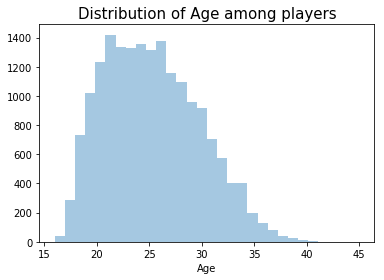

In [52]:
sns.distplot(df['Age'],kde=False,bins=30)
plt.title('Distribution of Age among players',fontsize = 15)
plt.show()

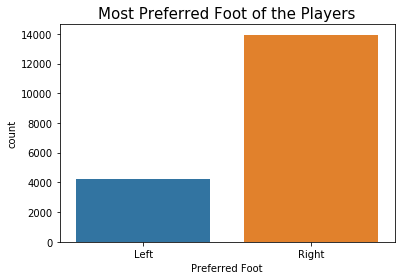

In [53]:
sns.countplot(df['Preferred Foot'])
plt.title('Most Preferred Foot of the Players', fontsize = 15)
plt.show()

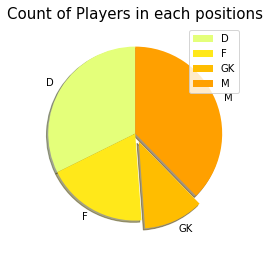

In [54]:
pos = df.groupby(by='Position').size().reset_index()
pos.columns = ['Position','Count']


labels = ['D', 'F', 'GK', 'M'] 
size = pos['Count']
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0.1, 0]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Count of Players in each positions', fontsize = 15)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Fifa Correlation of variables')

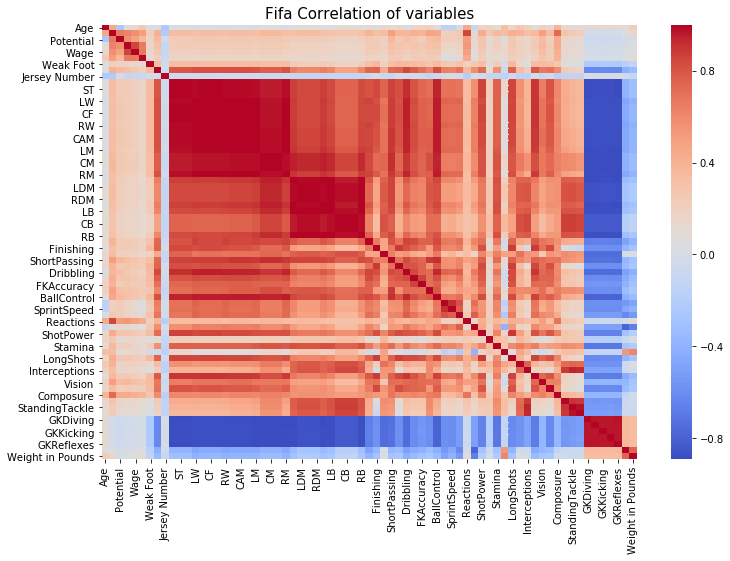

In [55]:
fig = plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Fifa Correlation of variables',fontsize = 15)

Text(0.5, 1.0, 'Age Vs Overall Rating distribution')

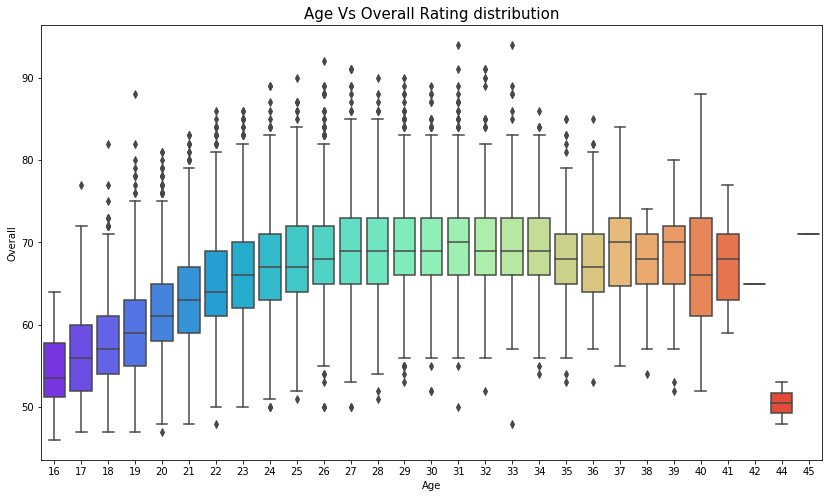

In [56]:
fig = plt.figure(figsize = (14,8))
sns.boxplot(x='Age',y='Overall',data=df , palette = 'rainbow')
plt.title('Age Vs Overall Rating distribution',fontsize = 15)

In [57]:
rating = pd.DataFrame(df.groupby(['Nationality'])['Overall'].sum().reset_index())
count = pd.DataFrame(rating.groupby('Nationality')['Overall'].sum().reset_index())

trace = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Overall'],
)]

layout = go.Layout(title = '<b>Country vs Ratings</b>')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

OOPS , where is England ? Check below for the magic :P

In [58]:
df_nations = df.groupby(by='Nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count']

In [59]:
df_nations[(df_nations['Nation'] == 'England') | (df_nations['Nation'] == 'Wales') 
           | (df_nations['Nation'] == 'Scotland') | (df_nations['Nation'] == 'Northern Ireland') ]

,Nation,Count
46,England,1657
114,Northern Ireland,79
131,Scotland,283
161,Wales,129


Adding values of England, Northern Ireland, Scotland and Wales under United Kingdom as our choropleth map considers the following countries as a whole which is included in the United Kingdom.

In [60]:
df_temp = pd.DataFrame(data= [['United Kingdom', 2148]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp, ignore_index=True)
df_nations.tail()

,Nation,Count
160,Venezuela,66
161,Wales,129
162,Zambia,9
163,Zimbabwe,13
164,United Kingdom,2148


In [61]:
trace2 = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Portland'
             )

layout = go.Layout(title='<b>Number of Players in each Country</b>',
                   geo=dict(showocean=True,
                            oceancolor='#AEDFDF',
                            projection=dict(type='natural earth'),
                        )
                  )

fig = go.Figure(data=[trace2], layout=layout)
py.iplot(fig)

Yayyyy , we finally found England :P

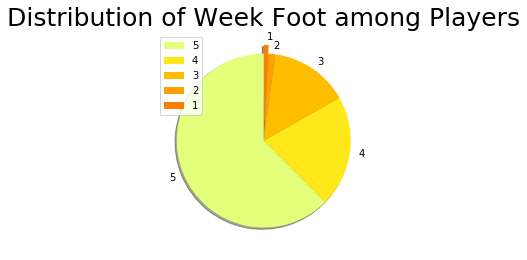

In [62]:
labels = ['5', '4', '3', '2', '1'] 
size = df['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()